In [ ]:
##code to plot PRISM rainfall data
## use the raster_to_nc.ipynb code to convert the raster (.bil, .hdr) data to netcdf
##specifically did for the PRISM rainfall data (downloaded from https://prism.oregonstate.edu/recent)
#Amanda Sinning

In [29]:
import netCDF4 as nc
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize

In [9]:
days = [14, 15, 16, 17, 18]

precip_all_days = None
precip_all_days_in = None
for day in days:
    #Open the NetCDF file for each day (if multiple days)
    file_path = f"PRISM_ppt_stable_4kmD1_200409{day}.nc"
    dataset = nc.Dataset(file_path)

    # Extract data
    precip = dataset.variables['precipitation'][:]
    precip_in = precip * 0.0393701  #convert mm to inches
    print(np.max(precip))
    lon = dataset.variables['lon'][:]
    lat = dataset.variables['lat'][:]
    
    #init accumulated precip array if is first iteraltion of the loop
    if precip_all_days is None:
        precip_all_days = np.zeros_like(precip)
    if precip_all_days_in is None:
        precip_all_days_in = np.zeros_like(precip_in)
    precip_all_days += precip  ##precip_all days contains the total rainfall accumulated over all the days
    precip_all_days_in += precip_in #same as above but in inches

#checking
print(f"Max accumulated precipitation (mm): {np.max(precip_all_days)}")
print(f"Max accumulated precipitation (in): {np.max(precip_all_days_in)}")

138.261
249.643
272.904
263.469
210.044
Max accumulated precipitation (mm): 320.16998291015625
Max accumulated precipitation (in): 12.605125427246094


In [11]:
print(np.shape(precip_all_days_in))
print(np.shape(lat))

(621, 1405)
(621,)


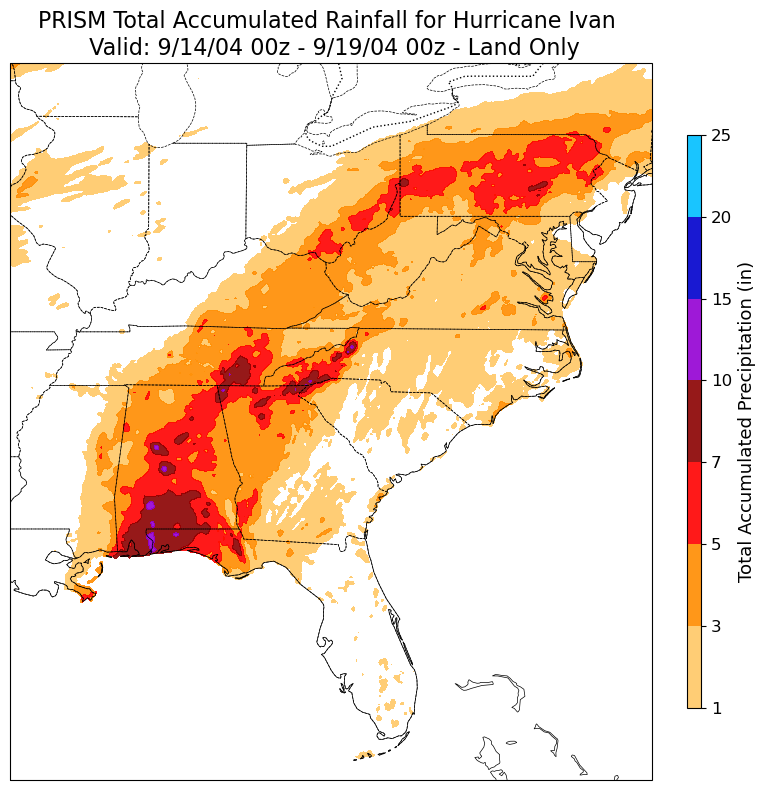

In [37]:
#set up colormap
clevs2 = [1, 3, 5, 7, 10, 15, 20, 25]
nws_precip_colors2 = [
    "#FFC866",  # 1 - 3 inches
    "darkorange",  # 3 - 5 inches
    "red",  # 5 - 7 inches
    "darkred",  # 7 - 10 inches
     "darkviolet",  # 10 - 15 inches
    "mediumblue",  # 15 - 20 inches
    "deepskyblue",  # 20 - 25 inches
    ]
cmap2 = matplotlib.colors.ListedColormap(nws_precip_colors2)
norm2 = mcolors.BoundaryNorm(clevs2, cmap2.N)


#Create a meshgrid of coordinates
lon_grid, lat_grid = np.meshgrid(lon, lat)

#setup plot
fig, ax = plt.subplots(
    figsize=(12, 8),
    subplot_kw={'projection': ccrs.PlateCarree()}
)
ax.set_extent([-91.4, -73.5, 24, 44], crs=ccrs.PlateCarree())  #'d02'
#ax.set_extent([-85.2, -79.5, 32.6, 39]) #d03 extent (zoomed in on mtns)

ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linewidth=0.5, linestyle='--')

#plot rain data
contour = ax.contourf(
    lon_grid, lat_grid, precip_all_days_in,
    levels=clevs2, cmap=cmap2, norm=norm2, alpha = 0.9,
    transform=ccrs.PlateCarree()
)

#colorbar
cbar = plt.colorbar(contour, ax=ax, orientation="vertical", pad=.03, shrink=.8, aspect=40)
cbar.set_label("Total Accumulated Precipitation (in)", fontsize=13)
cbar.ax.tick_params(labelsize=12)

ax.set_title("PRISM Total Accumulated Rainfall for Hurricane Ivan \n Valid: 9/14/04 00z - 9/19/04 00z - Land Only", fontsize=16)
plt.tight_layout()
plt.show()
